$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{Universidad de los Andes}$$
$$\textrm{Grupo de Física de Altas Energías: Fenomenología de Partículas}$$

$\textbf{Preliminares}$ 

Las librerías que se usan aquí son las siguientes: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

pd.options.mode.chained_assignment = None  # default='warn'

Por otro lado para graficar mapas de calor es util descargar mi repositorio:

In [2]:
!rm -rf Heatmap_Utilities/
!git clone https://github.com/Phenomenology-group-uniandes/Heatmap_Utilities.git

Cloning into 'Heatmap_Utilities'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 51 (delta 22), reused 27 (delta 9), pack-reused 0
Receiving objects: 100% (51/51), 2.67 MiB | 3.97 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [3]:
import sys, os
Path_significances_xs_plots = os.path.dirname(os.path.realpath('Heatmaps_JP.ipynb'))
sys.path.append(f'{Path_significances_xs_plots}/Heatmap_Utilities')
import nbimporter
from Heatmap_Utilities import Heatmap_Utilities as mapas_de_calor

In [4]:
format_figures = '.png'

Ahora leamos todos los archivos de excel con las tablas de significancias:

In [5]:
plots = ['all_combined', 'sLQ_combined', 'sLQ_hadronic', 'sLQ_semileptonic', 'dLQ_combined', 'dLQ_hadronic', 'dLQ_semileptonic']
betards = ['Betard_minus1', 'Betard_0']
folders = ['Significance_Heatmap_13TeV_L137','Significance_Heatmap_13_6TeV_L300', 'Significance_Heatmap_13_6TeV_L3000']

In [6]:
Datas = {}
for folder in folders:
    Datas[folder] = {}
    for betard in betards:
        Datas[folder][betard] = {}
        for plot in plots:
            carpeta = folder.replace('Significance_Heatmap_', 'S')
            Data = mapas_de_calor.read_excel(f'Excel_Files/{carpeta}/{betard}/{plot}.xlsx')
            Data.columns = [float(column)/1000 for column in Data.columns]
            for column in Data.columns:
                for fila in Data.index:
                    if (Data[column][fila] > 50): Data[column][fila] = 50            
            Datas[folder][betard][plot] = mapas_de_calor.smooth(Data, log = True)
            #Datas[folder][betard][plot] = Data

También debemos leer los datos de CMS para compararlos

In [7]:
expected = 'Expected_by_B_anomalies'
signals = ['Single', 'Pair', 'Total', 'Nonres']
linestyles = {'Continue': '-', 'Dashed': '--', 'Contour': ''}

Data_CMS = {}

Data_CMS[expected] = np.loadtxt(f'CMS_Comparison/Data_Right/{expected}.txt', delimiter = ';')
Data_CMS[expected][:,1] = Data_CMS[expected][:,1]*np.sqrt(2)
Data_CMS[expected][:,0] = Data_CMS[expected][:,0]/1000

for signal in signals:
    for linestyle in linestyles:
        Data_CMS[f'{signal}_{linestyle}'] = np.loadtxt(f'CMS_Comparison/Data_Right/{signal}_{linestyle}.txt', delimiter = ';')
        Data_CMS[f'{signal}_{linestyle}'][:,1] = Data_CMS[f'{signal}_{linestyle}'][:,1]*np.sqrt(2)
        Data_CMS[f'{signal}_{linestyle}'][:,0] = Data_CMS[f'{signal}_{linestyle}'][:,0]/1000
        
plots = ['all_combined', 'sLQ_combined', 'dLQ_combined'] #Esos son los únicos que se necesitan guardar
plots_scale = {'all_combined': np.sqrt(4 + 2), 'sLQ_combined': np.sqrt(2), 'dLQ_combined': 2}

Aquí podríamos graficar de una vez pero también necesitamos hacer una sección sombreada, practiquemos primero como se hace eso en general:

In [8]:
# x = np.linspace(0, 100, 500)

# x_1, y_1 = 0, 100
# x_2, y_2 = 100, 200

# y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

# x_3, y_3 = 0, 0
# x_4, y_4 = 100, 100

# y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

# fig, ax = plt.subplots()

# # Outline of the region we've filled in
# ax.plot(x, y1, c='black', alpha=0.8)
# ax.plot(x, y2, c='black', alpha=0.8)


# x = np.concatenate((x[0], x, x[-1]), axis = None)
# y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
# ax.fill(x, y, 'gray', alpha=0.3)

Aplicando este razonamiento solo bastaría conocer los puntos que definen la sección sombreada, para esto es util definir la siguiente función:

In [9]:
def Calcular_g_U(c_U, M):
    v = 246
    return 2*np.sqrt(c_U)*M/v

Finalmente podemos graficar:

In [10]:
!rm -rf Heatmaps/
!mkdir -p Heatmaps
for folder in folders: 
    !mkdir -p Heatmaps/{folder}
    for betard in betards: 
        !mkdir -p Heatmaps/{folder}/{betard}

In [11]:
titulos_izquierda = {'all_combined' : 'All',
                     'sLQ_combined' : 'sLQ',
                     'sLQ_hadronic' : 'sLQ',
                     'sLQ_semileptonic' : 'sLQ',
                     'dLQ_combined' : 'dLQ',
                     'dLQ_hadronic' : 'dLQ',
                     'dLQ_semileptonic' : 'dLQ'
}

# titulos_izquierda = {'all_combined' : '',
#                      'sLQ_combined' : '',
#                      'sLQ_hadronic' : '',
#                      'sLQ_semileptonic' : '',
#                      'dLQ_combined' : '',
#                      'dLQ_hadronic' : '',
#                      'dLQ_semileptonic' : ''
# }

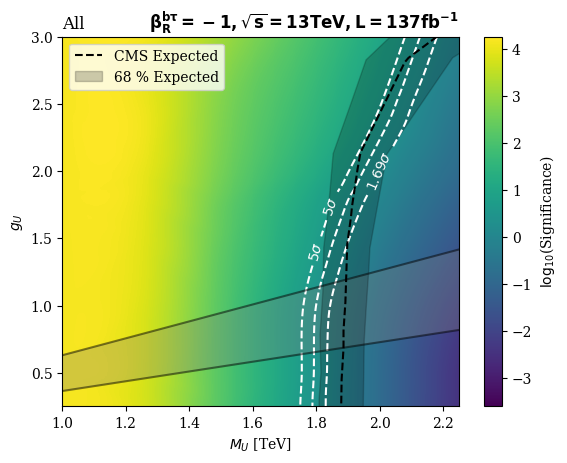

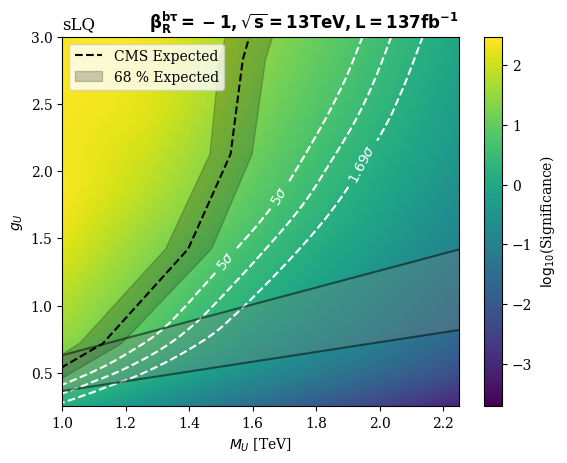

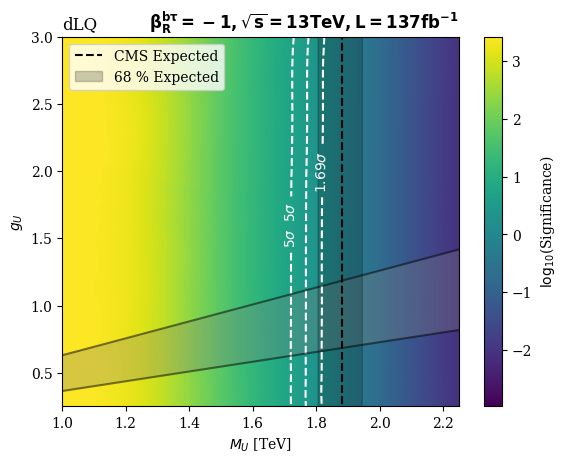

In [12]:
# Betard minus 1

ubicaciones = {'all_combined': [[1600/1000,1.5], [1750/1000, 1.8], [2000/1000, 2]],
               'sLQ_combined': [[1400/1000,1.5], [1700/1000, 1.8], [2000/1000, 2]], 
               'sLQ_hadronic': [[1400/1000,1.5], [1700/1000, 1.8], [2000/1000, 2]], 
               'sLQ_semileptonic':[[1400/1000,1.7], [1600/1000, 2], [1800/1000, 2.3]],
               'dLQ_combined': [[1600/1000,1.5], [1650/1000, 1.7], [1800/1000, 2]], 
               'dLQ_hadronic': [[1550/1000,1.3], [1600/1000, 1.8], [1700/1000, 2]], 
               'dLQ_semileptonic':[[1450/1000,1.9], [1550/1000, 2.1], [1700/1000, 2.3]]
              }

folder = folders[0]

for plot in plots:

    fig, ax = mapas_de_calor.plot_heatmap(Datas[folder]['Betard_minus1'][plot]*plots_scale[plot], 
                           curvas_de_nivel = {np.log10(1.69) : r'$1.69 \sigma$', np.log10(3): r'$3 \sigma$', np.log10(5): r'$5 \sigma$'},
                           curves_labels_locations= ubicaciones[plot],
                           titulos = {'titulo': '','titulo_izquierda': titulos_izquierda[plot], 'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = -1, \sqrt{s} = 13 TeV, L = 137 fb^{-1}}$' ,'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$\log_{10}$(Significance)'}
                          )
    ax.set_xlim(1000/1000,2250/1000)

    x = np.linspace(1000/1000, 2250/1000, 1000)

    x_1, y_1 = 1000/1000, Calcular_g_U(0.006, 1000)
    x_2, y_2 = 2250/1000, Calcular_g_U(0.006, 2250)

    y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

    x_3, y_3 = 1000/1000, Calcular_g_U(0.002, 1000)
    x_4, y_4 = 2250/1000, Calcular_g_U(0.002, 2250)

    y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

    # Outline of the region we've filled in
    ax.plot(x, y1, c='black', alpha=0.5)
    ax.plot(x, y2, c='black', alpha=0.5)

    x = np.concatenate((x[0], x, x[-1]), axis = None)
    y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
    ax.fill(x, y, 'gray', alpha=0.3)    
        
    if ('sLQ' in plot): 
        plt.plot(Data_CMS['Single_Dashed'][:,0], Data_CMS['Single_Dashed'][:,1], linestyle = '--', label = 'CMS Expected', color = 'black')
        ax.fill(Data_CMS['Single_Contour'][:,0], Data_CMS['Single_Contour'][:,1], label = '68 % Expected', color = 'black', alpha = 0.2)
        plt.xlim(1, 2.25)
        plt.ylim(0.25,3)
        plt.legend(loc = 'upper left')
        
    if ('dLQ' in plot): 
        plt.plot(Data_CMS['Pair_Dashed'][:,0], Data_CMS['Pair_Dashed'][:,1], linestyle = '--', label = 'CMS Expected', color = 'black')
        ax.fill(Data_CMS['Pair_Contour'][:,0], Data_CMS['Pair_Contour'][:,1], label = '68 % Expected', color = 'black', alpha = 0.2)
        plt.xlim(1, 2.25)
        plt.ylim(0.25,3)
        plt.legend(loc = 'upper left')
        
    if ('all' in plot): 
        plt.plot(Data_CMS['Total_Dashed'][:,0], Data_CMS['Total_Dashed'][:,1], linestyle = '--', label = 'CMS Expected', color = 'black')
        ax.fill(Data_CMS['Total_Contour'][:,0], Data_CMS['Total_Contour'][:,1], label = '68 % Expected', color = 'black', alpha = 0.2)
        plt.xlim(1, 2.25)
        plt.ylim(0.25,3)
        plt.legend(loc = 'upper left')
        
    plt.savefig(f'Heatmaps/{folder}/Betard_minus1/{folder}_{plot}_wRHC{format_figures}', dpi=300, bbox_inches='tight')

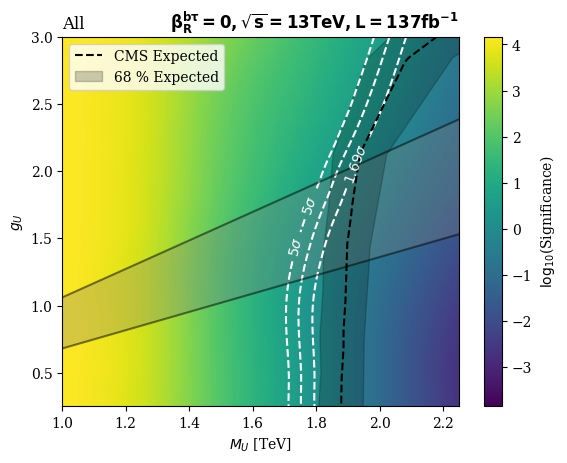

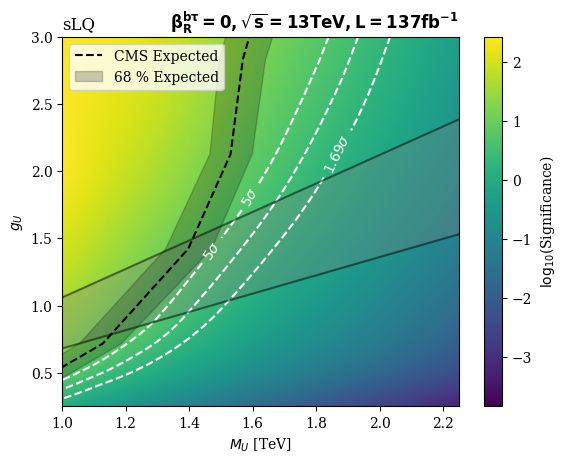

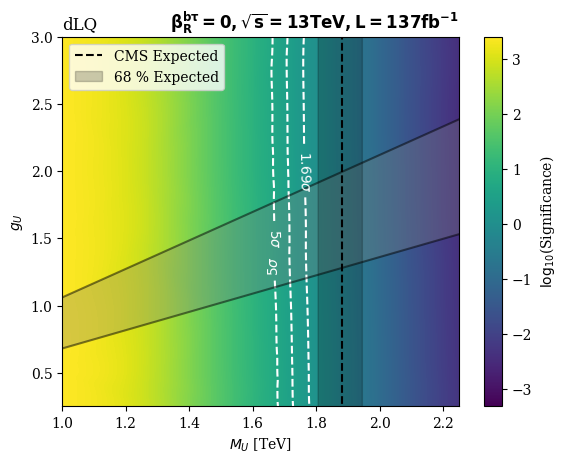

In [13]:
#Betard 0

ubicaciones = {'all_combined': [[1600/1000,1.5], [1700/1000, 1.8], [2000/1000, 2]],
               'sLQ_combined': [[1400/1000,1.5], [1600/1000, 1.8], [2000/1000, 2]], 
               'sLQ_hadronic': [[1400/1000,1.5], [1600/1000, 1.8], [2000/1000, 2]], 
               'sLQ_semileptonic':[[1200/1000,1.7], [1500/1000, 2], [1600/1000, 2.3]],
               'dLQ_combined': [[1400/1000,1.3], [1600/1000, 1.5], [1800/1000, 2]], 
               'dLQ_hadronic': [[1500/1000,1.3], [1600/1000, 1.7], [1700/1000, 2]], 
               'dLQ_semileptonic':[[1400/1000,1], [1500/1000, 1.7], [1750/1000, 2]]
              }

folder = folders[0]

for plot in plots:
    fig, ax = mapas_de_calor.plot_heatmap(Datas[folder]['Betard_0'][plot]*plots_scale[plot], 
                           curvas_de_nivel = {np.log10(1.69) : r'$1.69 \sigma$', np.log10(3): r'$3 \sigma$', np.log10(5): r'$5 \sigma$'},
                           curves_labels_locations = ubicaciones[plot],
                           titulos = {'titulo':'','titulo_izquierda': titulos_izquierda[plot], 'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = 0, \sqrt{s} = 13 TeV, L = 137 fb^{-1}}$' ,'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_{U}$', 'cbar_label': r'$\log_{10}$(Significance)'}
                          )
    
    ax.set_xlim(1000/1000,2250/1000)
    
    x = np.linspace(1000/1000, 2250/1000, 1000)

    x_1, y_1 = 1000/1000, Calcular_g_U(0.017, 1000)
    x_2, y_2 = 2250/1000, Calcular_g_U(0.017, 2250)

    y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

    x_3, y_3 = 1000/1000, Calcular_g_U(0.007, 1000)
    x_4, y_4 = 2250/1000, Calcular_g_U(0.007, 2250)

    y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

    # Outline of the region we've filled in
    ax.plot(x, y1, c='black', alpha=0.5)
    ax.plot(x, y2, c='black', alpha=0.5)

    x = np.concatenate((x[0], x, x[-1]), axis = None)
    y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
    ax.fill(x, y, 'gray', alpha=0.3)    
    
    if ('sLQ' in plot): 
        plt.plot(Data_CMS['Single_Dashed'][:,0], Data_CMS['Single_Dashed'][:,1], linestyle = '--', label = 'CMS Expected', color = 'black')
        ax.fill(Data_CMS['Single_Contour'][:,0], Data_CMS['Single_Contour'][:,1], label = '68 % Expected', color = 'black', alpha = 0.2)
        plt.xlim(1, 2.25)
        plt.ylim(0.25,3)
        plt.legend(loc = 'upper left')
        
    if ('dLQ' in plot): 
        plt.plot(Data_CMS['Pair_Dashed'][:,0], Data_CMS['Pair_Dashed'][:,1], linestyle = '--', label = 'CMS Expected', color = 'black')
        ax.fill(Data_CMS['Pair_Contour'][:,0], Data_CMS['Pair_Contour'][:,1], label = '68 % Expected', color = 'black', alpha = 0.2)
        plt.xlim(1, 2.25)
        plt.ylim(0.25,3)
        plt.legend(loc = 'upper left')
        
    if ('all' in plot): 
        plt.plot(Data_CMS['Total_Dashed'][:,0], Data_CMS['Total_Dashed'][:,1], linestyle = '--', label = 'CMS Expected', color = 'black')
        ax.fill(Data_CMS['Total_Contour'][:,0], Data_CMS['Total_Contour'][:,1], label = '68 % Expected', color = 'black', alpha = 0.2)
        plt.xlim(1, 2.25)
        plt.ylim(0.25,3)
        plt.legend(loc = 'upper left')
        
    plt.savefig(f'Heatmaps/{folder}/Betard_0/{folder}_{plot}_woRHC{format_figures}', dpi=300, bbox_inches='tight')

Proyecciones:

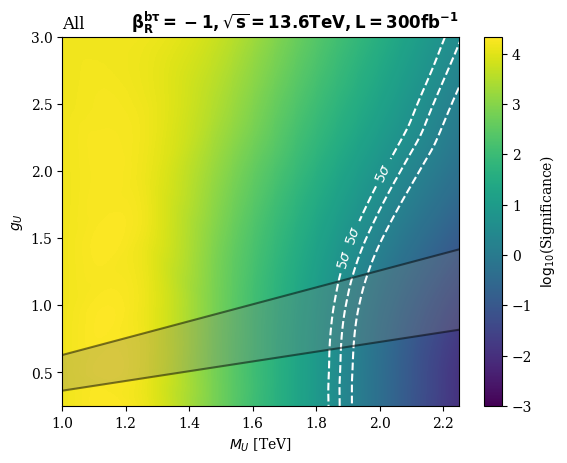

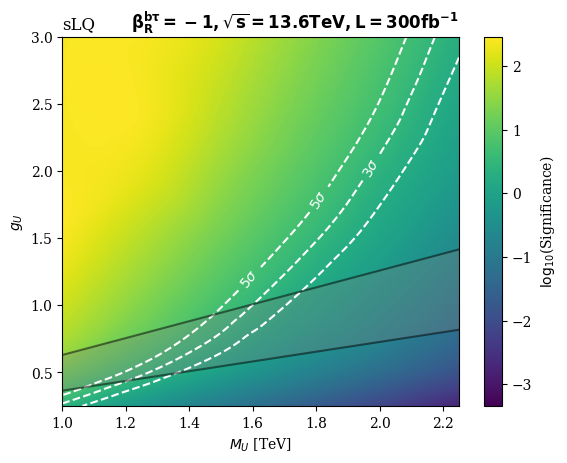

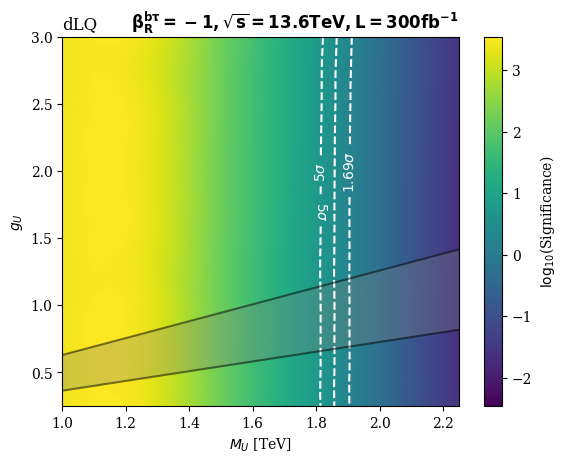

In [14]:
#Betard minus 1 - 300 fb

ubicaciones = {'all_combined': [[1600/1000,1.5], [1800/1000, 1.6], [2000/1000, 2]],
               'sLQ_combined': [[1400/1000,1.5], [1800/1000, 1.8], [2000/1000, 2]], 
               'sLQ_hadronic': [[1400/1000,1.5], [1800/1000, 1.8], [2000/1000, 2]], 
               'sLQ_semileptonic':[[1400/1000,1.7], [1600/1000, 2], [1800/1000, 2.3]],
               'dLQ_combined': [[1650/1000,2], [1800/1000, 1.7], [2000/1000, 2]], 
               'dLQ_hadronic': [[1600/1000,2], [1700/1000, 1.8], [1800/1000, 2]], 
               'dLQ_semileptonic':[[1550/1000,1.2], [1720/1000, 1.5], [1900/1000, 2.3]]
              }

folder = folders[1]

for plot in plots:

    fig, ax = mapas_de_calor.plot_heatmap(Datas[folder]['Betard_minus1'][plot]*plots_scale[plot], 
                           curvas_de_nivel = {np.log10(1.69) : r'$1.69 \sigma$', np.log10(3): r'$3 \sigma$', np.log10(5): r'$5 \sigma$'},
                           curves_labels_locations= ubicaciones[plot],
                           titulos = {'titulo':'','titulo_izquierda': titulos_izquierda[plot],'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = -1, \sqrt{s} = 13.6 TeV, L = 300 fb^{-1}}$' ,'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$\log_{10}$(Significance)'}
                          )
    ax.set_xlim(1000/1000,2250/1000)

    x = np.linspace(1000/1000, 2250/1000, 1000)

    x_1, y_1 = 1000/1000, Calcular_g_U(0.006, 1000)
    x_2, y_2 = 2250/1000, Calcular_g_U(0.006, 2250)

    y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

    x_3, y_3 = 1000/1000, Calcular_g_U(0.002, 1000)
    x_4, y_4 = 2250/1000, Calcular_g_U(0.002, 2250)

    y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

    # Outline of the region we've filled in
    ax.plot(x, y1, c='black', alpha=0.5)
    ax.plot(x, y2, c='black', alpha=0.5)

    x = np.concatenate((x[0], x, x[-1]), axis = None)
    y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
    ax.fill(x, y, 'gray', alpha=0.3)    
    plt.savefig(f'Heatmaps/{folder}/Betard_minus1/{folder}_{plot}_wRHC{format_figures}', dpi=300, bbox_inches='tight')

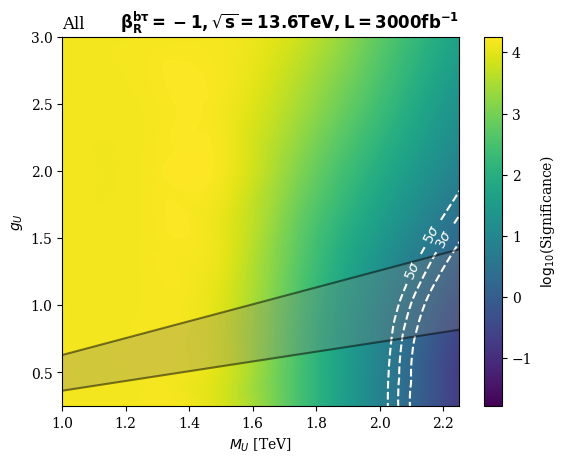

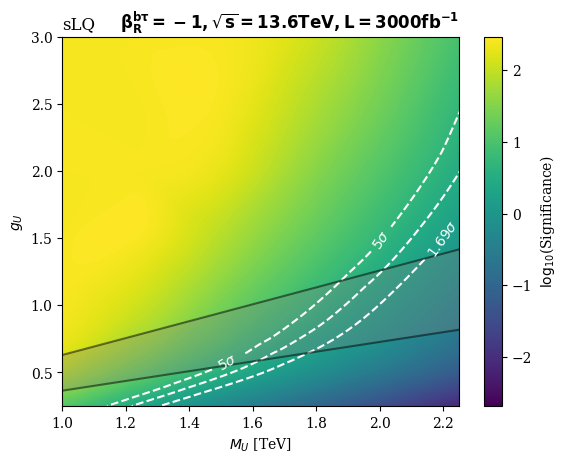

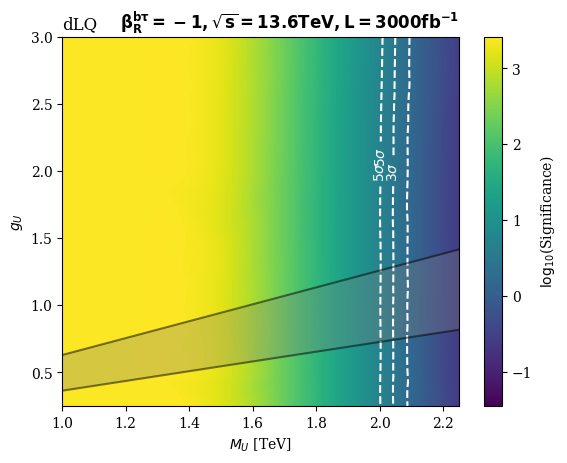

In [15]:
#Betard minus 1 - 3000 fb

ubicaciones = {'all_combined': [[1800/1000,1.5], [2100/1000, 1.6], [2200/1000, 1.5]],
               'sLQ_combined': [[1400/1000,1], [2000/1000, 1.5], [2200/1000, 1.5]], 
               'sLQ_hadronic': [[1400/1000,1], [2000/1000, 1.5], [2200/1000, 1.5]], 
               'sLQ_semileptonic':[[1400/1000,1.5], [1800/1000, 1.5], [2000/1000, 1.5]],
               'dLQ_combined': [[1900/1000,2], [1950/1000, 2], [2050/1000, 2]], 
               'dLQ_hadronic': [[1800/1000,2], [1950/1000, 2], [2050/1000, 2]], 
               'dLQ_semileptonic':[[1800/1000,2], [1900/1000, 2], [2050/1000, 2]]
              }

folder = folders[2]

for plot in plots:

    fig, ax = mapas_de_calor.plot_heatmap(Datas[folder]['Betard_minus1'][plot]*plots_scale[plot], 
                           curvas_de_nivel = {np.log10(1.69) : r'$1.69 \sigma$', np.log10(3): r'$3 \sigma$', np.log10(5): r'$5 \sigma$'},
                           curves_labels_locations= ubicaciones[plot],
                           titulos = {'titulo':'','titulo_izquierda': titulos_izquierda[plot],'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = -1, \sqrt{s} = 13.6 TeV, L = 3000 fb^{-1}}$' ,'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$\log_{10}$(Significance)'}
                          )
    ax.set_xlim(1000/1000,2250/1000)

    x = np.linspace(1000/1000, 2250/1000, 1000)

    x_1, y_1 = 1000/1000, Calcular_g_U(0.006, 1000)
    x_2, y_2 = 2250/1000, Calcular_g_U(0.006, 2250)

    y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

    x_3, y_3 = 1000/1000, Calcular_g_U(0.002, 1000)
    x_4, y_4 = 2250/1000, Calcular_g_U(0.002, 2250)

    y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

    # Outline of the region we've filled in
    ax.plot(x, y1, c='black', alpha=0.5)
    ax.plot(x, y2, c='black', alpha=0.5)

    x = np.concatenate((x[0], x, x[-1]), axis = None)
    y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
    ax.fill(x, y, 'gray', alpha=0.3)    
    plt.savefig(f'Heatmaps/{folder}/Betard_minus1/{folder}_{plot}_wRHC{format_figures}', dpi=300, bbox_inches='tight')

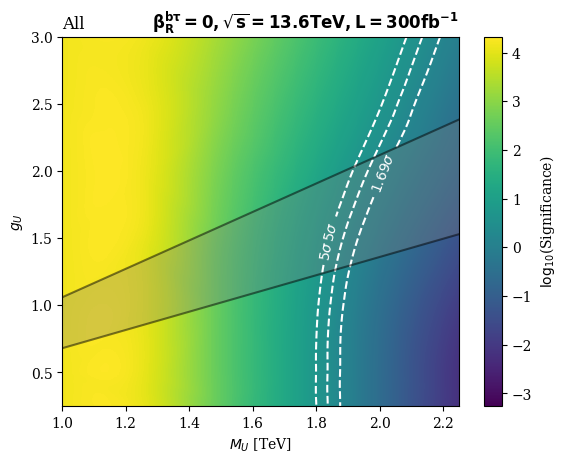

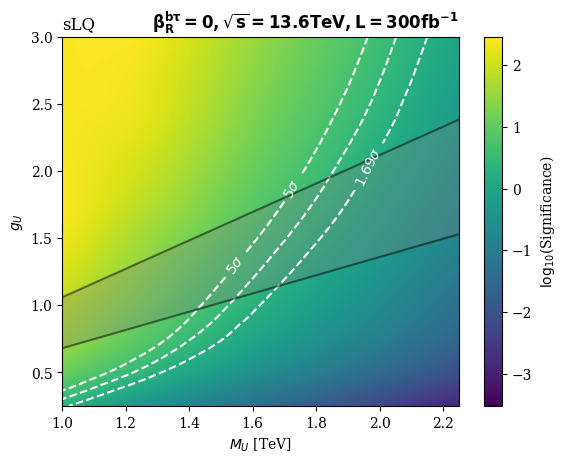

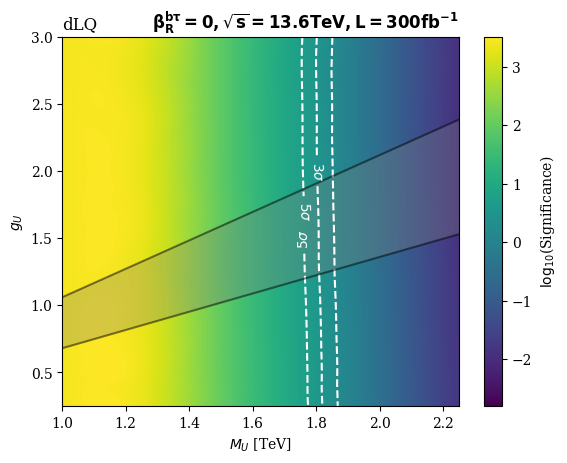

In [16]:
#Betard 0 - 300 fb

ubicaciones = {'all_combined': [[1600/1000,1.5], [1750/1000, 1.6], [2000/1000, 2]],
               'sLQ_combined': [[1400/1000,1.5], [1700/1000, 1.9], [2000/1000, 2]], 
               'sLQ_hadronic': [[1400/1000,1.5], [1700/1000, 1.9], [2000/1000, 2]], 
               'sLQ_semileptonic':[[1600/1000,1.5], [1700/1000, 2], [1800/1000, 2.3]],
               'dLQ_combined': [[1600/1000,1.5], [1700/1000, 1.7], [1800/1000, 2]], 
               'dLQ_hadronic': [[1500/1000,1.3], [1650/1000, 1.7], [1800/1000, 2]], 
               'dLQ_semileptonic':[[1500/1000,2], [1650/1000, 2], [1800/1000, 2]]
              }

folder = folders[1]

for plot in plots:
    fig, ax = mapas_de_calor.plot_heatmap(Datas[folder]['Betard_0'][plot]*plots_scale[plot], 
                           curvas_de_nivel = {np.log10(1.69) : r'$1.69 \sigma$', np.log10(3): r'$3 \sigma$', np.log10(5): r'$5 \sigma$'},
                           curves_labels_locations = ubicaciones[plot],
                           titulos = {'titulo':'','titulo_izquierda': titulos_izquierda[plot], 'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = 0, \sqrt{s} = 13.6 TeV, L = 300 fb^{-1}}$' ,'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_{U}$', 'cbar_label': r'$\log_{10}$(Significance)'}
                          )
    
    ax.set_xlim(1000/1000,2250/1000)
    
    x = np.linspace(1000/1000, 2250/1000, 1000)

    x_1, y_1 = 1000/1000, Calcular_g_U(0.017, 1000)
    x_2, y_2 = 2250/1000, Calcular_g_U(0.017, 2250)

    y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

    x_3, y_3 = 1000/1000, Calcular_g_U(0.007, 1000)
    x_4, y_4 = 2250/1000, Calcular_g_U(0.007, 2250)

    y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

    # Outline of the region we've filled in
    ax.plot(x, y1, c='black', alpha=0.5)
    ax.plot(x, y2, c='black', alpha=0.5)

    x = np.concatenate((x[0], x, x[-1]), axis = None)
    y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
    ax.fill(x, y, 'gray', alpha=0.3)    
    plt.savefig(f'Heatmaps/{folder}/Betard_0/{folder}_{plot}_woRHC{format_figures}', dpi=300, bbox_inches='tight')

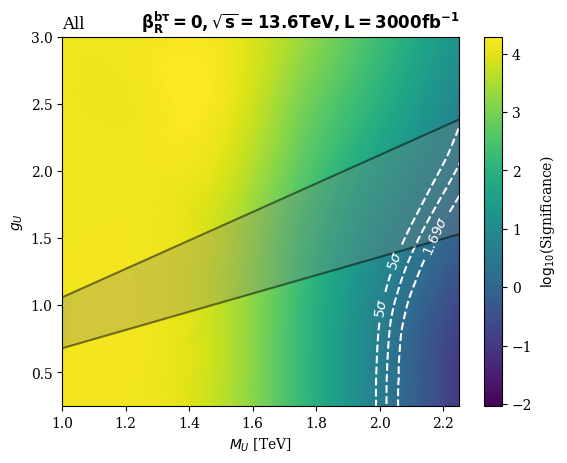

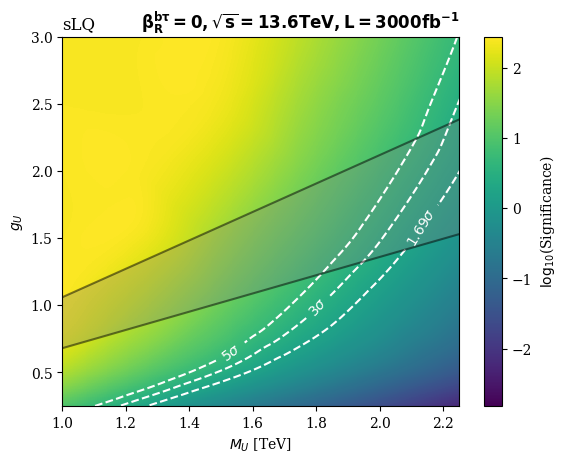

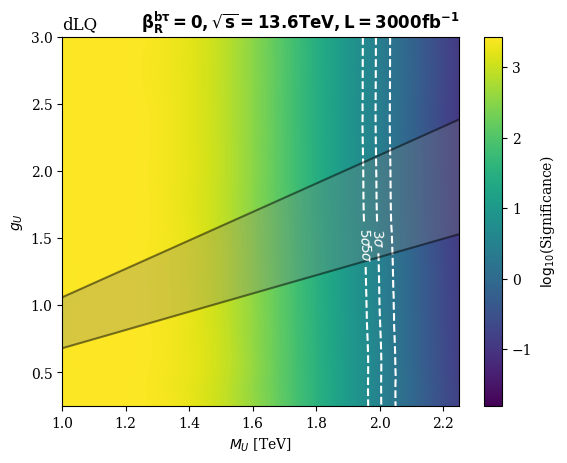

In [17]:
#Betard 0 - 3000 fb

ubicaciones = {'all_combined': [[1800/1000,1.5], [1950/1000, 1], [2200/1000, 1.5]],
               'sLQ_combined': [[1400/1000,1], [1800/1000, 1], [2200/1000, 1.5]], 
               'sLQ_hadronic': [[1400/1000,1], [1700/1000, 1], [2200/1000, 1.5]], 
               'sLQ_semileptonic':[[1800/1000,1.3], [1900/1000, 1.5], [2000/1000, 1.8]],
               'dLQ_combined': [[1800/1000,1.5], [1900/1000, 1.5], [2000/1000, 1.5]], 
               'dLQ_hadronic': [[1800/1000,1.5], [1900/1000, 1.5], [2000/1000, 1.5]], 
               'dLQ_semileptonic':[[1800/1000,1.3], [1850/1000, 1.5], [2000/1000, 1.8]]
              }

folder = folders[2]

for plot in plots:
    fig, ax = mapas_de_calor.plot_heatmap(Datas[folder]['Betard_0'][plot]*plots_scale[plot], 
                           curvas_de_nivel = {np.log10(1.69) : r'$1.69 \sigma$', np.log10(3): r'$3 \sigma$', np.log10(5): r'$5 \sigma$'},
                           curves_labels_locations = ubicaciones[plot],
                           titulos = {'titulo':'','titulo_izquierda': titulos_izquierda[plot], 'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = 0, \sqrt{s} = 13.6 TeV, L = 3000 fb^{-1}}$' ,'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_{U}$', 'cbar_label': r'$\log_{10}$(Significance)'}
                          )
    
    ax.set_xlim(1000/1000,2250/1000)
    
    x = np.linspace(1000/1000, 2250/1000, 1000)

    x_1, y_1 = 1000/1000, Calcular_g_U(0.017, 1000)
    x_2, y_2 = 2250/1000, Calcular_g_U(0.017, 2250)

    y1 = np.poly1d(np.polyfit([x_1,x_2], [y_1, y_2], deg=1))(x)

    x_3, y_3 = 1000/1000, Calcular_g_U(0.007, 1000)
    x_4, y_4 = 2250/1000, Calcular_g_U(0.007, 2250)

    y2 = np.poly1d(np.polyfit([x_3,x_4], [y_3, y_4], deg=1))(x)

    # Outline of the region we've filled in
    ax.plot(x, y1, c='black', alpha=0.5)
    ax.plot(x, y2, c='black', alpha=0.5)

    x = np.concatenate((x[0], x, x[-1]), axis = None)
    y = np.concatenate((y2[0], y1, y2[-1]), axis = None)
    ax.fill(x, y, 'gray', alpha=0.3)    
    plt.savefig(f'Heatmaps/{folder}/Betard_0/{folder}_{plot}_woRHC{format_figures}', dpi=300, bbox_inches='tight')

In [18]:
!rm -rf Heatmap_Utilities/